<h1>Deutsch--Josza Algorithm</h1>

<p1> constant function f(0)=f(1)    
     balanced function f(0)!=f(1)</p1>

In [1]:
from qiskit import QuantumCircuit,execute,Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np

In [2]:
n=3
fOallx=QuantumCircuit(n+1,name='fOallx') # constant oracle for f(x)=0 for all x


In [3]:
f1allx =QuantumCircuit(n+1,name='f1allx') # constant oracle for f(x)=1 for all x
f1allx.x(n)

In [4]:
f01half=QuantumCircuit(n+1,name="f01half") #f(x)=0 for half of inputs and f(X)=1 for other half
xgate='101'
cxgate='101'


for i in range(n):
    if xgate[i]=='1':
        f01half.x(i)
        
for i in range(n):
    if cxgate[i]=='1':
        f01half.cx(i,n)
        

for i in range(n):
    if xgate[i]=='1':
        f01half.x(i)

f01half.draw()

┌───┐     ┌───┐     
q_0: ┤ X ├──■──┤ X ├─────
     └───┘  │  └───┘     
q_1: ───────┼────────────
     ┌───┐  │       ┌───┐
q_2: ┤ X ├──┼────■──┤ X ├
     └───┘┌─┴─┐┌─┴─┐└───┘
q_3: ─────┤ X ├┤ X ├─────
          └───┘└───┘

In [5]:
def test_circuit(circuit):
    dj_circuit=QuantumCircuit(n+1,n)

    dj_circuit.h(range(n))

    #setting anicilia to |->
    dj_circuit.x(n)
    dj_circuit.h(n)

    dj_circuit.barrier()

    dj_circuit.append(circuit,range(n+1))
    dj_circuit.barrier()

    dj_circuit.h(range(n))

    for i in range(n):
        dj_circuit.measure(i,i)

    display(dj_circuit.draw('mpl'))
    return dj_circuit

In [8]:
def checkoutput(circuit):
    backend=Aer.get_backend('qasm_simulator')
    shots=1024
    results=execute(circuit,backend=backend,shots=shots).result()
    count=results.get_counts()

    display(plot_histogram(count))

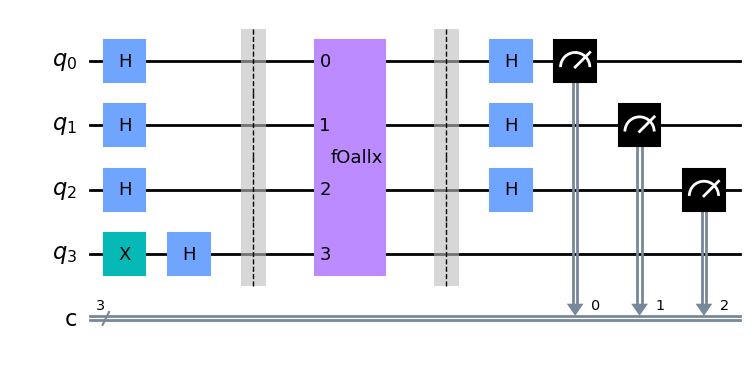

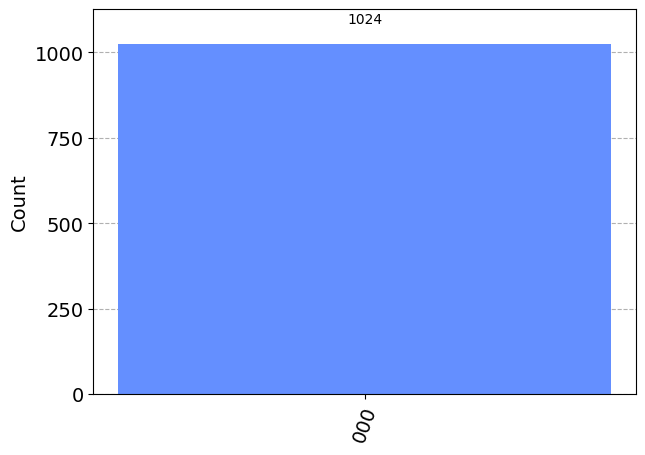

In [9]:
# constant function # output should be zero
circuit=test_circuit(fOallx)
checkoutput(circuit)

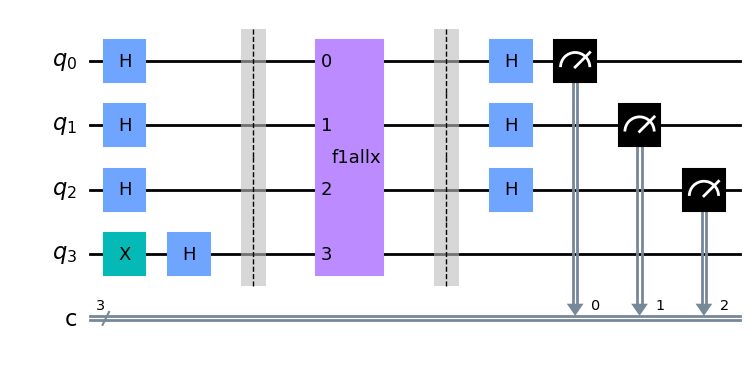

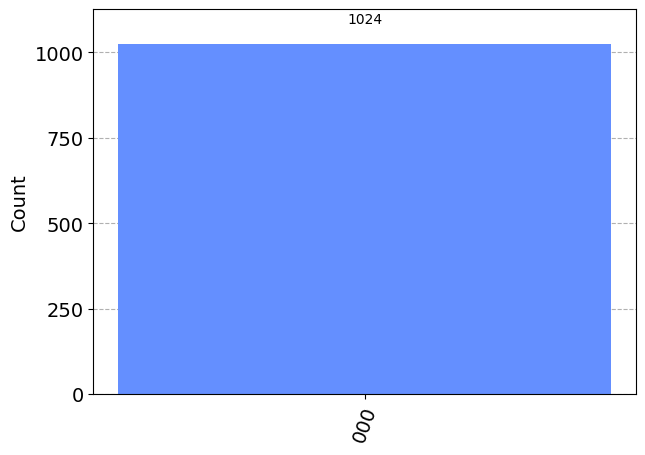

In [10]:
#constant circuit output=0
circuit=test_circuit(f1allx)
checkoutput(circuit)

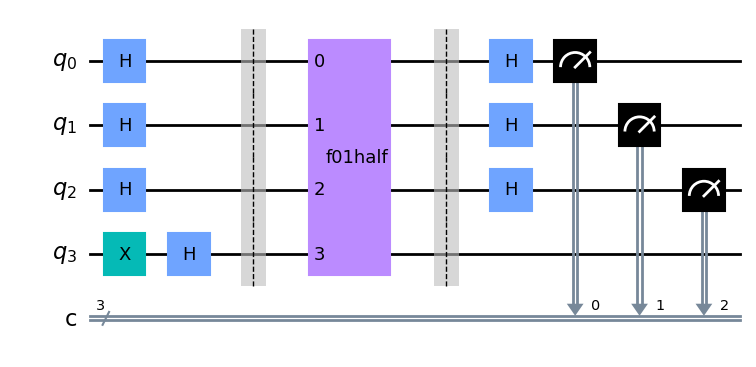

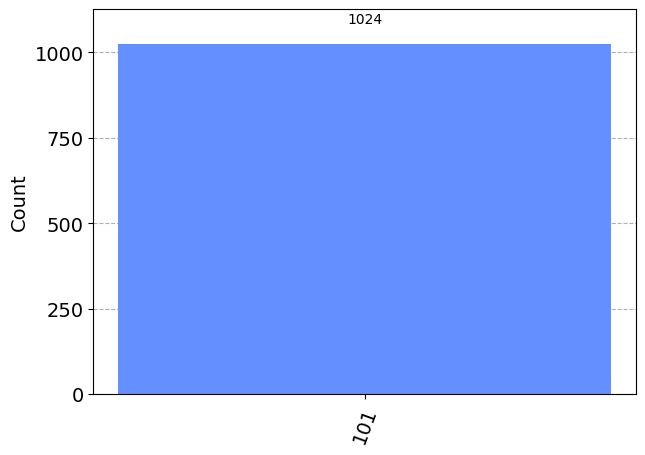

In [12]:
#output other then 0
circuit=test_circuit(f01half)
checkoutput(circuit)